In [3]:
import os
import anndata as ad
import matplotlib as plt
import numpy as np
import pandas as pd
import scanpy as sc
from scipy import io
from scipy.sparse import coo_matrix, csr_matrix

In [4]:
# load sparse matrix:
X = io.mmread("/path/to/counts.mtx")

# create anndata object
adata = ad.AnnData(X=X.transpose().tocsr())

# load cell metadata:
cell_meta = pd.read_csv("/path/to/metadata.csv")

# load gene names:
with open("/path/to/gene_names.csv", "r") as f:
    gene_names = f.read().splitlines()

# set anndata observations and index obs by barcodes, var by gene names
adata.obs = cell_meta
adata.obs.index = adata.obs["barcode"]
adata.var.index = gene_names

# load dimensional reduction:
pca = pd.read_csv("/path/to/pca.csv")
pca.index = adata.obs.index

# set pca and umap
adata.obsm["X_pca"] = pca.to_numpy()
adata.obsm["X_umap"] = np.vstack(
    (adata.obs["UMAP_1"].to_numpy(), adata.obs["UMAP_2"].to_numpy())
).T

/tmp/ipykernel_31921/2325761626.py:5: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(


/home/fotakis/.conda/envs/scvelo/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


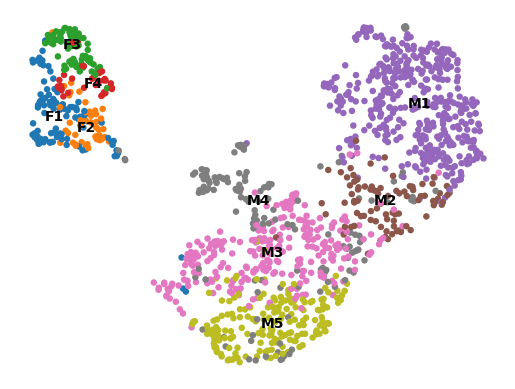

In [5]:
# plot umap - sanity check
sc.pl.umap(
    adata, color="cell_types", frameon=False, legend_loc="on data", title=""
)  # , save = 'UMAP2.pdf')

In [6]:
# metadata sanity check
adata.obs

,nCount_RNA,nFeature_RNA,orig.ident,condition,subject,patient,patient_condition,percent.mt,nCount_SCT,nFeature_SCT,...,SCT_snn_res.1.5,Georg_clusters,NS_clusters1,NS_clusters2,NS_patho,NS_patho2,barcode,UMAP_1,UMAP_2,cell_types
barcode,,,,,,,,,,,,,,,,,,,,,
P1_normal_AACCAACAGTACGAGC-1,771,490,normal_P1,normal,P1,P1,normal_P1,16.212711,3867,870,...,2,1,F1,F1,BE,BE,P1_normal_AACCAACAGTACGAGC-1,-7.514640,2.951101,F1
P1_normal_AACCATGCAAACCACT-1,750,533,normal_P1,normal,P1,P1,normal_P1,3.466667,3554,899,...,3,3,F2,F2,BE,BE,P1_normal_AACCATGCAAACCACT-1,-6.520034,1.487803,F2
P1_normal_AACCTGAGTCAGACGA-1,550,388,normal_P1,normal,P1,P1,normal_P1,9.454545,3563,864,...,6,1,F1,F1,BE,BE,P1_normal_AACCTGAGTCAGACGA-1,-7.286025,3.469666,F1
P1_normal_AACGGGAGTGCAACGA-1,523,374,normal_P1,normal,P1,P1,normal_P1,3.824092,3387,865,...,3,3,F2,F2,BE,BE,P1_normal_AACGGGAGTGCAACGA-1,-6.052792,1.707686,F2
P1_normal_AACGGGATCTGCATAG-1,673,425,normal_P1,normal,P1,P1,normal_P1,18.276374,3823,837,...,2,1,F1,F1,BE,BE,P1_normal_AACGGGATCTGCATAG-1,-7.528632,3.076796,F1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P4_tumor_TTAGGCACAGCAGATG-1,16548,4021,tumor_P4,tumor,P4,P4,tumor_P4,6.206188,6064,2081,...,20,8,M2,M2,CA,activated,P4_tumor_TTAGGCACAGCAGATG-1,2.458605,-1.436695,M2
P4_tumor_TTCATGTTCGCTACGG-1,16351,3817,tumor_P4,tumor,P4,P4,tumor_P4,8.464314,6079,2008,...,0,7,M1,M1,CA,activated,P4_tumor_TTCATGTTCGCTACGG-1,4.491541,2.195683,M1
P4_tumor_TTCCTTCAGCATGAAT-1,8455,2482,tumor_P4,tumor,P4,P4,tumor_P4,6.528681,6258,2477,...,10,7,M1,M1,CA,activated,P4_tumor_TTCCTTCAGCATGAAT-1,3.027924,3.307218,M1


<AxesSubplot: title={'center': 'PLN'}, xlabel='UMAP1', ylabel='UMAP2'>

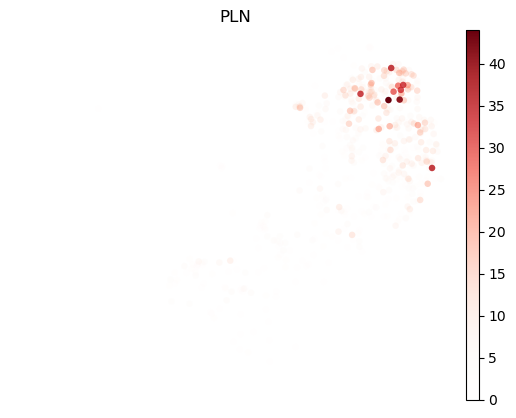

In [7]:
# make red colormap (genes PLN)
colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colorsComb = np.vstack([colors2])
mymap = plt.colors.LinearSegmentedColormap.from_list("my_colormap", colorsComb)
my_cmap = mymap(np.arange(mymap.N))
my_cmap[:, -1] = np.linspace(0, 1, mymap.N)
my_cmap = plt.colors.ListedColormap(my_cmap)

sc.pl.umap(
    adata, color=["PLN"], use_raw=False, color_map=my_cmap, show=False, frameon=False
)

<AxesSubplot: title={'center': 'CNN1'}, xlabel='UMAP1', ylabel='UMAP2'>

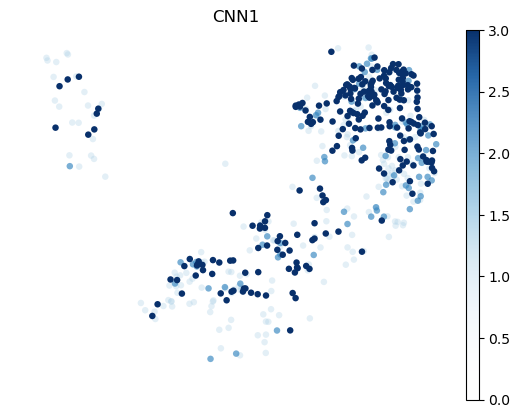

In [8]:
# make blue colormap (genes CNN1)
colors2 = plt.cm.Blues(np.linspace(0, 1, 128))
colorsComb = np.vstack([colors2])
mymap = plt.colors.LinearSegmentedColormap.from_list("my_colormap", colorsComb)
my_cmap2 = mymap(np.arange(mymap.N))
my_cmap2[:, -1] = np.linspace(0, 1, mymap.N)
my_cmap2 = plt.colors.ListedColormap(my_cmap2)

sc.pl.umap(
    adata,
    color=["CNN1"],
    use_raw=False,
    color_map=my_cmap2,
    show=False,
    frameon=False,
    vmax=3,
)

<AxesSubplot: title={'center': 'CCDC102B'}, xlabel='UMAP1', ylabel='UMAP2'>

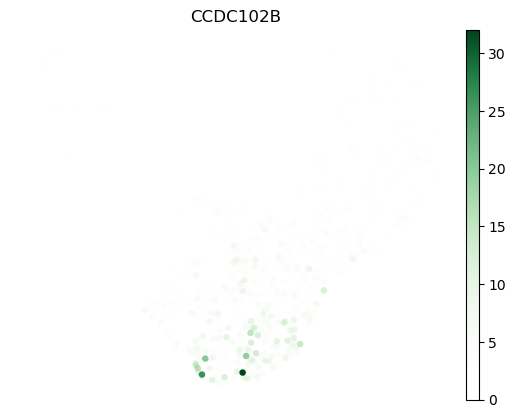

In [9]:
# make green colormap (genes CCDC102B)
colors2 = plt.cm.Greens(np.linspace(0, 1, 128))
colorsComb = np.vstack([colors2])
mymap = plt.colors.LinearSegmentedColormap.from_list("my_colormap", colorsComb)
my_cmap3 = mymap(np.arange(mymap.N))
my_cmap3[:, -1] = np.linspace(0, 1, mymap.N)
my_cmap3 = plt.colors.ListedColormap(my_cmap3)

sc.pl.umap(
    adata,
    color=["CCDC102B"],
    use_raw=False,
    color_map=my_cmap3,
    show=False,
    frameon=False,
)

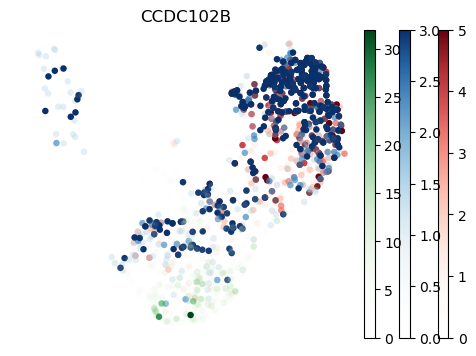

In [10]:
# combine images to one UMAP
plt.rcParams["figure.figsize"] = (6, 4)
ax = sc.pl.umap(
    adata,
    color=["PLN"],
    use_raw=False,
    color_map=my_cmap,
    show=False,
    vmax=5,
    frameon=False,
)
ax = sc.pl.umap(
    adata,
    color=["CNN1"],
    use_raw=False,
    color_map=my_cmap2,
    show=False,
    vmax=3,
    frameon=False,
    ax=ax,
)
ax = sc.pl.umap(
    adata,
    color=["CCDC102B"],
    use_raw=False,
    color_map=my_cmap3,
    show=False,
    frameon=False,
    ax=ax,
)

In [19]:
# To save the plot in different formats change the save='UMAP_3genes.svg' parameter to .png,.pdf, etc.
sc.set_figure_params(figsize=(8, 8), dpi=300)
ax = sc.pl.umap(
    adata,
    color=["PLN"],
    use_raw=False,
    color_map=my_cmap,
    show=False,
    vmax=5,
    frameon=False,
)
ax = sc.pl.umap(
    adata,
    color=["CNN1"],
    use_raw=False,
    color_map=my_cmap2,
    show=False,
    vmax=3,
    frameon=False,
    ax=ax,
)
ax = sc.pl.umap(
    adata,
    color=["CCDC102B"],
    use_raw=False,
    color_map=my_cmap3,
    show=False,
    frameon=False,
    ax=ax,
    save="UMAP_3genes.pdf",
)